In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import svm
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

**Data Understanding:**

A.Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [3]:
dfn = pd.read_csv("Normal.csv") #Read file 1
dfh = pd.read_csv("Type_H.csv") #Read file 2
dfs = pd.read_csv("Type_S.csv") #Read file 3

**Print Shape and columns of all the 3 DataFrames - File 1 - Normal**

In [4]:
dfn.shape # 7 Columns and 100 Rows 

(100, 7)

In [5]:
dfn.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [6]:
dfn.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

**Print Shape and columns of all the 3 DataFrames - File 2 - Type_H**

In [7]:
dfh.shape # 7 columns and 60 Rows

(60, 7)

In [8]:
dfh.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [9]:
dfh.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

**Print Shape and columns of all the 3 DataFrames - File 3 - Type_S**

In [10]:
dfs.shape # 7 columns and 150 rows

(150, 7)

In [11]:
dfs.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [12]:
dfs.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

**Compare Column names of all the 3 DataFrames and clearly write observations**

In [13]:
dfn1 = dfn.columns
dfh1 = dfh.columns
dfs1 = dfs.columns

common_cols = dfn1.intersection(dfh1) #Compare columns in first and 2nd dataframe
common_cols

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [14]:
different_cols = dfn1.difference(dfh1) #column names that are only contained in the dfn.
different_cols

Index([], dtype='object')

In [15]:
common_cols1 = dfn1.intersection(dfs1) #Compare columns in first and 3rd dataframe
common_cols1

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [16]:
different_cols1 = dfn1.difference(dfs1) #column names that are only contained in the dfn and not dfs.
different_cols1

Index([], dtype='object')

**Based on above we can see that column names are similar in all 3 data frames** 
- **any of the dataframe does not contain different column names than other.**

**Print DataTypes of all the 3 DataFrames.**

In [17]:
dfn.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [18]:
dfh.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [19]:
dfs.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

**Observe and share variation in ‘Class’ feature of all the 3 DaraFrames**

In [20]:
dfn['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [21]:
dfh['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [22]:
dfs['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

Normal and Nrmal, Type_H and type_h, Type_S and tp_s are same and can be unified

**2. Data Preparation and Exploration:
A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames**

In [23]:
dfs.loc[dfs['Class']=='tp_s','Class']='Type_S'
dfn.loc[dfn['Class']=='Nrmal','Class']='Normal'
dfh.loc[dfh['Class']=='type_h','Class']='Type_H'

In [24]:
dfn['Class'].value_counts()

Normal    100
Name: Class, dtype: int64

In [25]:
dfh['Class'].value_counts()

Type_H    60
Name: Class, dtype: int64

In [26]:
dfs['Class'].value_counts()

Type_S    150
Name: Class, dtype: int64

**Combine all the 3 DataFrames to form a single DataFrame**

In [27]:
finaldf = dfn.append([dfh,dfs], ignore_index=True)
finaldf

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


**Print 5 random samples of this DataFrame**

In [28]:
finaldf.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
177,58.782548,7.667044,53.338941,51.115504,98.501157,51.584125,Type_S
50,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,Normal
73,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,Normal
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,Normal
257,44.216464,1.507075,46.110339,42.709390,108.629567,42.810481,Type_S


**Print Feature-wise percentage of Null values.**

In [29]:
finaldf.isnull() # or the sum method below to get total count for each columns

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
305,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False


In [30]:
finaldf.isnull().sum() #get total null values for each column

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

**Check 5-point summary of the new DataFrame**

In [31]:
finaldf.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**1.Mean and median are approx equal for first five columns and these columns might have a normal distribution however last column S_Degree may have right skewness since mean > median.
2. Outliers present in most of the columns due to max. values as per above table**

**

**Data Analysis:
A. Visualize a heatmap to understand correlation between all features**

In [32]:
df1=finaldf.corr()
df1

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


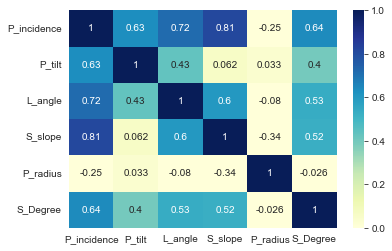

In [33]:
sns.heatmap(df1,vmin=0, vmax=1, annot=True, cmap="YlGnBu");

**Features having stronger correlation with correlation value**

*High correlation among P_incidence and S_slope with 0.81 value*

*High correlation among P_incidence and L_angle with 0.72 value*

*P_incidence with S-Degree with 0.64

**Features having weaker correlation with correlation value.**

*P_tilt with P_radius with 0.033*

*P_tilt with S_slope with 0.062*

""

**Visualize a pairplot with 3 classes distinguished by colors and share insights.**

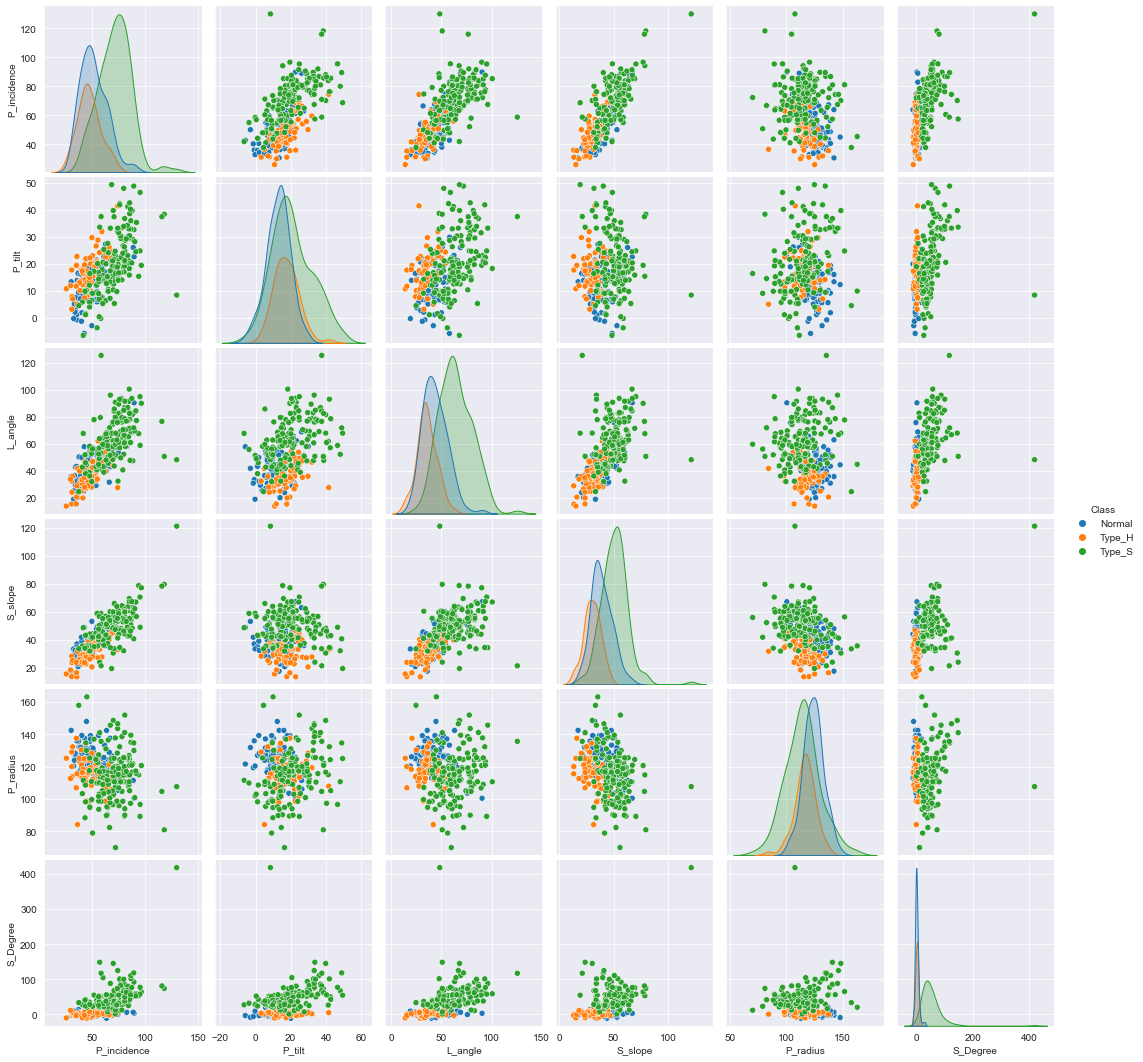

In [34]:
sns.pairplot(finaldf, hue="Class");

**Based on the pairplot distribution we can that variable distribution is not same where Type_S are higher as compared to type_H and Normal. Type_H variable are low as compared to other 2**

**Higher Positive relationship of P_incidence with S_slope and L_angle. Also P_tilt with L_angle and P_incidence**

**L_angle has positive relationship with S_slope, P_tilt and P_incidence**

**No strong positive relationship of S_degree with any other variable**

**P_radius has no Relationship with s_degree, P_tilt and L_angle.**


""

**Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights**

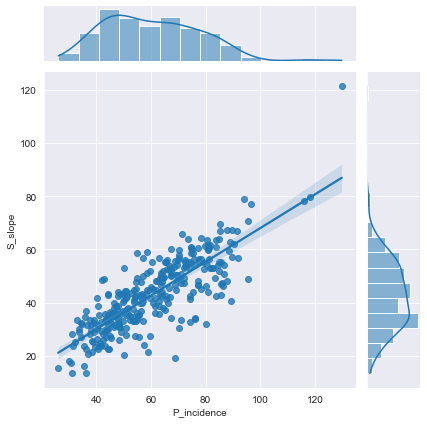

In [35]:
sns.jointplot(data=finaldf, x="P_incidence", y="S_slope", kind="reg")

In [36]:
finaldf.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

**P_incidence has higher positive relationship with S_slope i.e with increase in P_incidence S_slope will also increase**

""

**Visualize a boxplot to check distribution of the features and share insights**

<AxesSubplot:ylabel='S_Degree'>

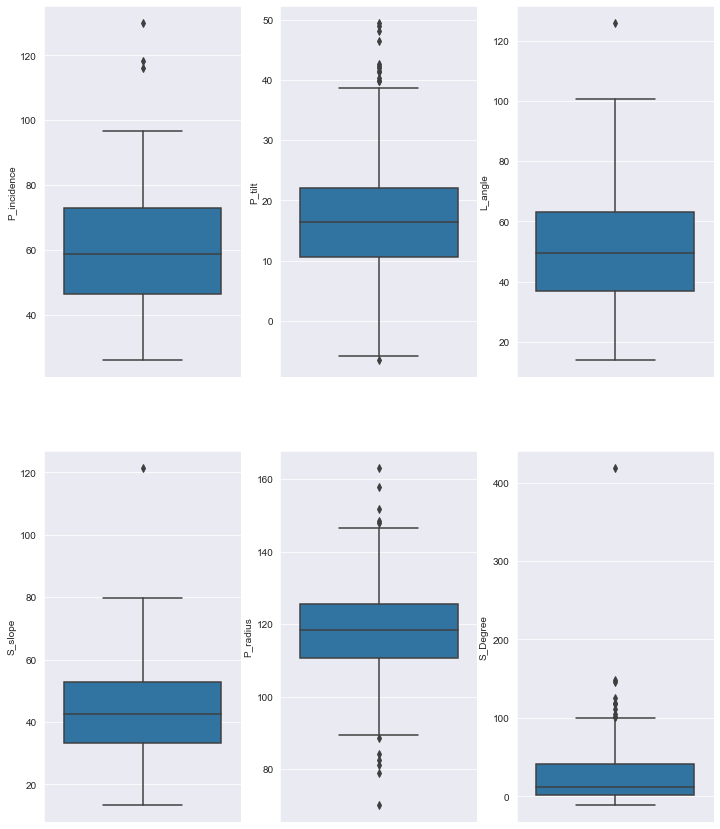

In [37]:
box_plot, ax = plt.subplots(2, 3)

box_plot.set_figheight(15)
box_plot.set_figwidth(12)

sns.boxplot(y=finaldf['P_incidence'],ax=ax[0][0])
sns.boxplot(y=finaldf['P_tilt'],ax=ax[0][1])
sns.boxplot(y=finaldf['L_angle'],ax=ax[0][2])
sns.boxplot(y=finaldf['S_slope'],ax=ax[1][0])
sns.boxplot(y=finaldf['P_radius'],ax=ax[1][1])
sns.boxplot(y=finaldf['S_Degree'],ax=ax[1][2])


**1. P_incidence - Data is normal with less extreme values and approx 3 outliers**

**2. P_tilt - Normal distribution with maybe a little skewness to the right. 1 outlier on negative end side and few on positive end are present.**

**3. L_angle - Normal distribution with with 1 outlier which might cause right skewness**

**4. S_slope - Almost a normal distribution with 1 outliers which may cause right skewness**

**5. P_radius - Normal distribution with outlisers on both ends**

**6. S_Degree - Right skewed due to high number or outliers**

""

Checking and handlig outliers

In [38]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for c in col:
    q25,q75=np.percentile(finaldf[c],25),np.percentile(finaldf[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in finaldf[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = finaldf.loc[(finaldf[c] >= lower) & (finaldf[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    finaldf[c]=np.where(finaldf[c]>upper,mean,finaldf[c])
    finaldf[c]=np.where(finaldf[c]<lower,mean,finaldf[c])
    Outliers=[i for i in finaldf[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in P_incidence Before Imputing : 3


 Mean of P_incidence is 59


 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13


 Mean of P_tilt is 16


 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1


 Mean of L_angle is 51


 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1


 Mean of S_slope is 42


 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11


 Mean of P_radius is 118


 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10


 Mean of S_Degree is 22


 Total Number of outliers in S_Degree After Imputing : 0




# Model Building

In [39]:
class_mean=finaldf.groupby('Class') #getting mean values of each class for all independent variables
class_mean.mean().reset_index()

,Class,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,Normal,51.685244,12.821414,43.542605,38.863830,123.591888,2.186572
1,Type_H,47.638407,16.972839,35.463524,30.239612,117.037611,2.480251
2,Type_S,70.268211,18.863527,63.611826,50.236655,114.783596,43.416785


In [40]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
finaldf['Class']=le.fit_transform(finaldf['Class'])
finaldf['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [41]:
X=finaldf.drop(columns='Class') 
y=finaldf['Class'] 


In [42]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-6.159947e-17,5.241663e-17,1.876635e-16,-2.438909e-16,-8.022257e-16,-1.130816e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-2.094203e+00,-2.669021e+00,-2.089008e+00,-2.321190e+00,-2.539211e+00,-1.320025e+00
25%,-8.355166e-01,-6.963909e-01,-8.142027e-01,-7.399847e-01,-5.974493e-01,-8.173729e-01
50%,-7.463765e-02,-6.537350e-02,-1.179154e-01,-2.758162e-02,-5.408187e-03,-4.138745e-01
75%,7.707333e-01,5.330588e-01,6.249289e-01,7.737986e-01,6.300660e-01,6.332235e-01
max,2.281479e+00,2.646095e+00,2.718904e+00,2.927936e+00,2.508397e+00,3.100356e+00


In [43]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=10)

**Train a Supervised Learning Classification base model using KNN classifier**

In [44]:
KNN = KNeighborsClassifier(n_neighbors= 3 , metric = 'euclidean' )
KNN.fit(X_train, y_train)
predic_labels = KNN.predict(X_test)
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9354838709677419
Accuracy on Test data: 0.7096774193548387


**Accuracy is low on test data maybe due to overfitting**

**Print all the possible performance metrics for both train and test data**

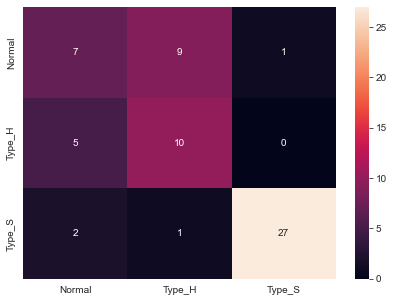

In [47]:
finaldf['Class']=finaldf['Class'].astype('category') #changing datatype to category.

conf_m = confusion_matrix(y_test, predic_labels, labels=[0, 1,2])

df_conf_m = pd.DataFrame(conf_m, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_conf_m, annot=True ,fmt='g')
plt.show()

Type_s is predicted correctly mostly while misclassification for normal and type H class is more


**Classification report**

In [51]:
print("classification  Matrix:\n",classification_report(y_test,predic_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.50      0.67      0.57        15
           2       0.96      0.90      0.93        30

    accuracy                           0.71        62
   macro avg       0.65      0.66      0.65        62
weighted avg       0.72      0.71      0.71        62



-class 0 predicted correctly for 50% of time. similary for class 1 50% and class 2 96%

-Accuracy score for the model is low on test data

-Max F1 score and recall for class 2

# **Best K Value**

In [52]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

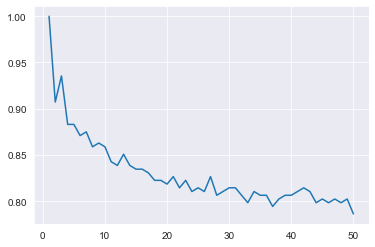

In [53]:
plt.plot(range(1,51),train_score)
plt.show()

**Training accuracy decreased with increased K-Value**

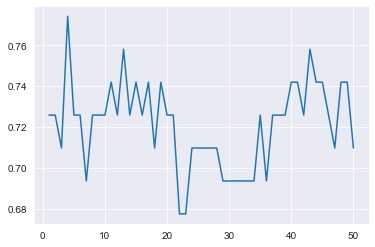

In [54]:
plt.plot(range(1,51),test_score)
plt.show()

In [55]:
k= list(range(1, 50, 2))
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7258064516129032:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.52      0.65      0.58        17
           1       0.57      0.53      0.55        15
           2       0.96      0.87      0.91        30

    accuracy                           0.73        62
   macro avg       0.69      0.68      0.68        62
weighted avg       0.75      0.73      0.73        62

Accuracy on Training data for k 3 is 0.9354838709677419:
Accuracy on Test data for k 3 is 0.7096774193548387:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.50      0.67      0.57        15
           2       0.96      0.90      0.93        30

    accuracy                           0.71        62
   macro avg       0.65      0.66      0.65        62
weighted avg       0.72      0.71     

**We can take K value as 13 for the best model**

# **Finding best Model**

By tuning hyperparameters i.e Gridsearch. 

Reasearch References: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
Kaggle dataset: https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning

In [56]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

KNNmodel = KNeighborsClassifier()


n_neighbors = range(1, 50, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
algorithm = ['auto', 'ball_tree','kd_tree','brute']

# define grid search
params = dict(n_neighbors=n_neighbors,weights=weights,metric=metric,algorithm=algorithm)


In [64]:
KNNmodel = KNeighborsClassifier()

KNNmodel_cv = GridSearchCV(KNNmodel,params,cv=10,n_jobs=-1,scoring='accuracy',error_score=0)
KNNmodel_cv.fit(X_train, y_train)

#summarize results
print("Best parameters :",KNNmodel_cv.best_params_)
print("accuracy :",KNNmodel_cv.score(X_test,y_test))

Best parameters : {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
accuracy : 0.7580645161290323


""

**The model is best with K 13 value and other parameters mentioned above with balanced accuracy scores on train and test along with good precision and recall values**

In [66]:
KNN1 = KNeighborsClassifier(n_neighbors= 13 , metric = 'euclidean', algorithm= 'auto',weights= 'distance' )
KNN1.fit(X_train, y_train)
predic_labels1 = KNN1.predict(X_test)
print('Accuracy on Training data:',KNN1.score(X_train, y_train) )
print('Accuracy on Test data:',KNN1.score(X_test, y_test) )

Accuracy on Training data: 1.0
Accuracy on Test data: 0.7580645161290323


Improved accuracy by almost 6% for test data

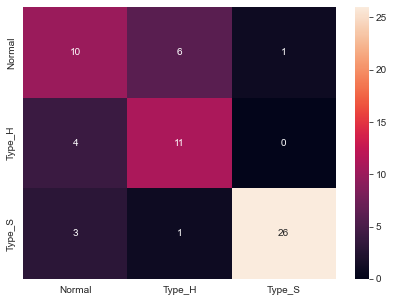

In [67]:
conf_m1 = confusion_matrix(y_test, predic_labels1, labels=[0, 1,2])

df_conf_m1 = pd.DataFrame(conf_m1, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_conf_m1, annot=True ,fmt='g')
plt.show()

In [68]:
print("classification  Matrix:\n",classification_report(y_test,predic_labels1))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.61      0.73      0.67        15
           2       0.96      0.87      0.91        30

    accuracy                           0.76        62
   macro avg       0.72      0.73      0.72        62
weighted avg       0.78      0.76      0.76        62



**The model is improved in accuracy, recall score and precision with best paramters**

# Part B

**CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.**

**PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.**

# Data Understanding and Preparation: 

**A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.**

In [154]:
Data1 = pd.read_csv('Dataone.csv')
Data2 = pd.read_csv('Datatwo.csv')

In [155]:
Data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [156]:
Data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


""

**B. Print shape and Column Names and DataTypes of both the Dataframes.**

In [157]:
Data1.shape

(5000, 8)

In [158]:
Data2.shape

(5000, 7)

In [159]:
Data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [160]:
Data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [161]:
Data1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [162]:
Data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

**Merge both the Dataframes on ‘ID’ feature to form a single DataFrame**

In [163]:
data = Data1.merge(Data2,left_on='ID',right_on='ID')

In [164]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [165]:
data.shape

(5000, 14)

**Change Datatype of below features to ‘Object’**

‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’

In [166]:
columns=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard']
for i in columns:
    data[i]=data[i].astype('object')

In [167]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

**Data Exploration and Analysis:**


**Check the percentage of missing values and impute if required.**

In [168]:
data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [169]:
data.dropna(axis=0,inplace=True) #Drop null values since count is less
data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

**--->Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.**

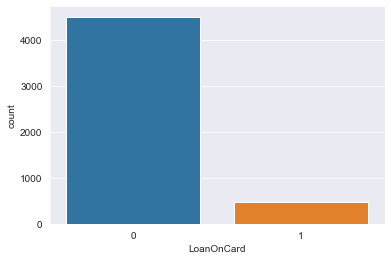

In [170]:
sns.countplot('LoanOnCard',data=data,order=[0,1]);
plt.show()

<AxesSubplot:ylabel='LoanOnCard'>

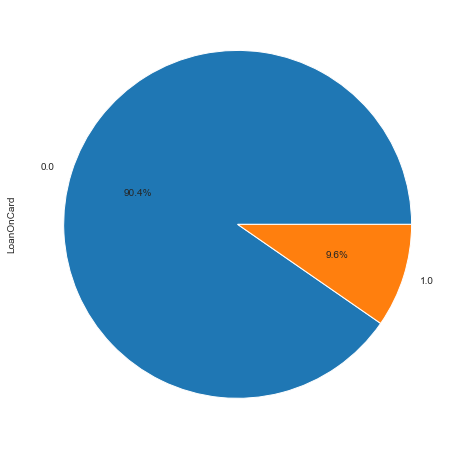

In [171]:
data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15,8))

**Almost 90% of people does not have loan on credit card**

""

**Check for unexpected values in each categorical variable and impute with best suitable value.**

In [172]:
data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

**There are no missing/unexpeted values in categorical variables. Only "LoanOnCard" feature had 20 missing values which we have imputed and removed above already since the number was less**

""

**Data Preparation and model building:**

A. Split data into X and Y.

In [143]:
data.drop(['ID', 'ZipCode'], axis=1) #Dropped ID and Zipcode columns since these are not required
X = data.drop(columns="LoanOnCard")
y = data['LoanOnCard'] #target


**Split X and y into training and test set in 75:25 ratio**

In [144]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=10)

In [145]:
X_train1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
740,741,52,27,195,90266,1,8.1,1,0,0,0,0,0
368,369,63,37,30,92054,2,1.0,3,159,0,0,1,0
2296,2297,27,3,82,94305,2,0.2,1,0,0,0,0,1
2788,2789,45,20,30,96003,1,0.1,1,0,0,0,1,0
1143,1144,33,7,120,94022,1,3.2,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1201,36,12,22,92507,4,1.0,1,91,1,0,1,0
3461,3462,57,27,64,92007,3,2.0,3,142,0,0,1,0
1364,1365,44,19,69,92129,4,0.4,1,0,0,0,0,0
4643,4644,33,7,35,95616,4,0.8,1,0,0,0,1,0


**Train a Supervised Learning Classification base model - Logistic Regression.**

In [146]:
logit_reg = LogisticRegression()
logit_reg.fit(X_train1, y_train1)
logit_reg_pred = logit_reg.predict(X_test1)

**Print evaluation metrics for the model and clearly share insights**

In [147]:
print('Accuracy on Training data:',logit_reg.score(X_train1, y_train1) )
print('Accuracy on Test data:',logit_reg.score(X_test1, y_test1) )

Accuracy on Training data: 0.9381526104417671
Accuracy on Test data: 0.9461847389558233


93% accuracy on training and 94% accuracy on testing data.

Both train and test set are balance with good accuracy score

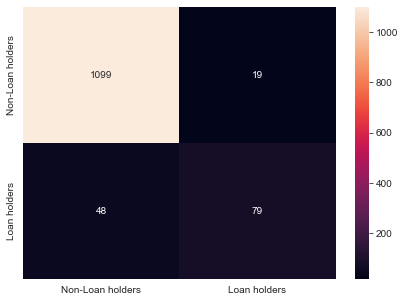

In [148]:
#confusion matrix

cm1 = confusion_matrix(y_test1, logit_reg_pred, labels=[0, 1])

df_cm1 = pd.DataFrame(cm1, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True ,fmt='g')
plt.show()

In [149]:
print("classification  Matrix:\n",classification_report(y_test1,logit_reg_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1118
         1.0       0.81      0.62      0.70       127

    accuracy                           0.95      1245
   macro avg       0.88      0.80      0.84      1245
weighted avg       0.94      0.95      0.94      1245



**The model is predicting class 0 accurately however the perfromance for class 1 is not good based on recall values.**

""

**Balance the data using the right balancing technique.**

**Samples for class 1 are not enough to train the model hence we will need to balance the target variable to 50:50**

In [150]:
y.value_counts() #data is not balanced for both values

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

**Re-sampling/balancing the data set**

Research references: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://elitedatascience.com/imbalanced-classes

In [151]:
##importing libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [152]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_rs,y_rs=smote_nc.fit_resample(X,y)

In [153]:
y_rs.value_counts()

1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64

The data is balanced now. Preparing model on balanced data set

In [35]:
#Split data into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_rs, y_rs, test_size=0.25, random_state=10)

In [87]:
#Logistic Regression model
logres = LogisticRegression() 
logres.fit(X_train2, y_train2)
logres_pred = logres.predict(X_test2)

print('Accuracy on Training data:',logres.score(X_train2, y_train2) )
print('Accuracy on Test data:',logres.score(X_test2, y_test2) )

Accuracy on Training data: 0.8931851851851852
Accuracy on Test data: 0.8844444444444445


**Accuracy is reduced after sampling. Checking confusion matrix and classification report.**



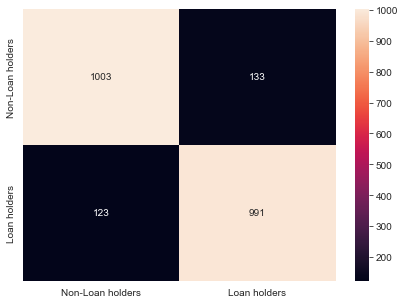

In [37]:
cm2 = confusion_matrix(y_test2, logres_pred, labels=[0, 1])

df_cm2 = pd.DataFrame(cm2, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True ,fmt='g')
plt.show()

In [88]:
print("classification  Matrix:\n",classification_report(y_test2,logres_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1136
         1.0       0.88      0.89      0.88      1114

    accuracy                           0.88      2250
   macro avg       0.88      0.88      0.88      2250
weighted avg       0.88      0.88      0.88      2250



**We can see that recall value for class has improved after re-sampling and balancing the target variable however the accuracy has decreased**

""

**Performance Improvement:**

A. Train a base model each for SVM, KNN.

In [76]:
## KNN Model

NNH = KNeighborsClassifier(n_neighbors= 5)
NNH.fit(X_train2, y_train2)
predicted_labels2 = NNH.predict(X_test2)
NNH.score(X_test2, y_test2)

0.8617777777777778

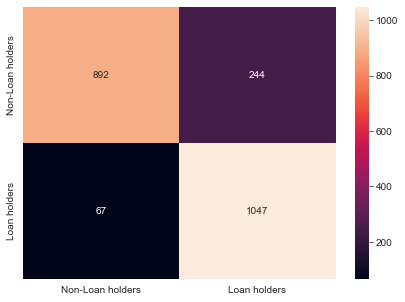

In [77]:
# Confusion matrix for KNN model

cm3 = confusion_matrix(y_test2, predicted_labels2, labels=[0, 1])

df_cm3 = pd.DataFrame(cm3, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True ,fmt='g')
plt.show()

In [79]:
## SVM Model

clf = svm.SVC(gamma=1, C= 5, kernel='linear',random_state = 10 ) 
clf.fit(X_train2, y_train2)

predict_1 = clf.predict(X_test2)

print(clf.score(X_train2, y_train2))
print(clf.score(X_test2, y_test2))

0.8771851851851852
0.8671111111111112


In [80]:
## Confusion matrix for SVM Model

print("Confusion Matrix:\n",confusion_matrix(predict_1,y_test2))

Confusion Matrix:
 [[965 128]
 [171 986]]


""

**Tune parameters for each of the models wherever required and finalize a model.**

(Optional: Experiment with various Hyperparameters - Research required)


Reasearch References: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5 Kaggle dataset: https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [82]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [62]:
## Parameter tuning for logistic regression model

##Defining paramters and grid
grid1={'solver': ('liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'),"penalty":["l1","l2"],"C":[-1,0,1,10,100]}

logres=LogisticRegression() #model
logres_cv=GridSearchCV(logres,grid1,cv=10)
logres_cv.fit(X_train2, y_train2)

#summarizing results

print("Best parameters :",logres_cv.best_params_)
print("accuracy :",logres_cv.score(X_test2,y_test2))

Best parameters : {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9075555555555556


In [83]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [61]:
## Parameter tuning for SVM model model

# Defining parameters
kernel = ['poly', 'rbf', 'sigmoid']
C = [100,50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

#defining grid
grid4 = dict(kernel=kernel,C=C,gamma=gamma)

model = SVC() #model

clf = GridSearchCV(estimator=model, param_grid=grid4, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
clf_result = clf.fit(X_train2, y_train2)
# summarize results

print("Best parameters :",clf.best_params_)
print("accuracy :",clf.score(X_test2,y_test2))

Best parameters : {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
accuracy : 0.8191111111111111


In [84]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [63]:
## Parameter tuning for KNN model

# Defining parameters
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid3 = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

knn_clf = KNeighborsClassifier() #model

knn_clf_cv = GridSearchCV(knn_clf,grid3,cv=10,n_jobs=-1,scoring='accuracy',error_score=0)
knn_clf_cv.fit(X_train2, y_train2)

#summarize results
print("Best parameters :",knn_clf_cv.best_params_)
print("accuracy :",knn_clf_cv.score(X_test2,y_test2))

Best parameters : {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
accuracy : 0.908


**Based on tuning of hyperparameters we can see the best model is linear regression however KNN model also has high accuracy.**

**we will consider logistic regression model since for KNN the K value is 1 and hence this model is not best fit**

Applying suggested parameters on the logistic regression model and KNN on balanced dataset in order to compare with base model

**Print evaluation metrics for final model**

In [44]:
logres3 = LogisticRegression(penalty='l2',C=10,solver = 'liblinear') 
logres3.fit(X_train2, y_train2)
logres3_pred = logres3.predict(X_test2)

print('Accuracy on Training data:',logres3.score(X_train2, y_train2) )
print('Accuracy on Test data:',logres3.score(X_test2, y_test2) )

Accuracy on Training data: 0.9050370370370371
Accuracy on Test data: 0.9075555555555556


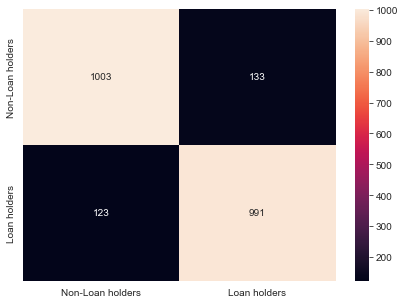

In [50]:
cm4 = confusion_matrix(y_test2, logres3_pred, labels=[0, 1])

df_cm4 = pd.DataFrame(cm4, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True ,fmt='g')
plt.show()

In [51]:
print("classification  Matrix:\n",classification_report(y_test2,logres3_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1136
         1.0       0.91      0.90      0.91      1114

    accuracy                           0.91      2250
   macro avg       0.91      0.91      0.91      2250
weighted avg       0.91      0.91      0.91      2250



**Share improvement achieved from base model to final model.**

Logistic regression model recall score was 0.62 on imbalanced dataset with 95% accuracy and changed to 0.89 after the data was balanced.

The score changed to 0.90 for recall and 0.91 for accuracy after tuning of hyperparameters on balanced dataset as displayed above

**Logistic regression model is best among all above with best recall and accuracy score.**